In [ ]:
! kaggle datasets download -d salader/dogs-vs-cats

! unzip dogs-vs-cats.zip

Streaming output truncated to the last 5000 lines.
  inflating: dogs_vs_cats/train/dogs/dog.4425.jpg  
  inflating: dogs_vs_cats/train/dogs/dog.4426.jpg  
  inflating: dogs_vs_cats/train/dogs/dog.4427.jpg  
  inflating: dogs_vs_cats/train/dogs/dog.4431.jpg  
  inflating: dogs_vs_cats/train/dogs/dog.4433.jpg  
  inflating: dogs_vs_cats/train/dogs/dog.4436.jpg  
  inflating: dogs_vs_cats/train/dogs/dog.4438.jpg  
  inflating: dogs_vs_cats/train/dogs/dog.4439.jpg  
  inflating: dogs_vs_cats/train/dogs/dog.444.jpg  
  inflating: dogs_vs_cats/train/dogs/dog.4440.jpg  
  inflating: dogs_vs_cats/train/dogs/dog.4441.jpg  
  inflating: dogs_vs_cats/train/dogs/dog.4442.jpg  
  inflating: dogs_vs_cats/train/dogs/dog.4443.jpg  
  inflating: dogs_vs_cats/train/dogs/dog.4444.jpg  
  inflating: dogs_vs_cats/train/dogs/dog.4445.jpg  
  inflating: dogs_vs_cats/train/dogs/dog.4446.jpg  
  inflating: dogs_vs_cats/train/dogs/dog.445.jpg  
  inflating: dogs_vs_cats/train/dogs/dog.4450.jpg  
  inflating: do

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers,models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import random
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import plot_model
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
from tensorflow.keras.preprocessing.image import img_to_array,load_img


In [ ]:
random.sample(os.listdir('/content/dogs_vs_cats/train/dogs'),9)

['dog.3965.jpg',
 'dog.7828.jpg',
 'dog.7274.jpg',
 'dog.4519.jpg',
 'dog.6984.jpg',
 'dog.11069.jpg',
 'dog.3391.jpg',
 'dog.10326.jpg',
 'dog.5093.jpg']

In [ ]:
def plot_image_from_directory(directory_path,class_animal,num_images=9):
  image_filenames=os.listdir(directory_path)
  if len(image_filenames)<num_images:
    print(f"Only found {len(image_filenames)} images in {directory_path},displaying then all.")
    num_images=len(image_filenames)
  selected_images=random.sample(image_filenames,num_images)
  fig,axes=plt.subplots(3,3,figsize=(10,10))
  axes=axes.ravel()
  for i ,image_file in enumerate(selected_images):
    image_path=os.path.join(directory_path,image_file)
    image=Image.open(image_path)
    axes[i].imshow(image)
    axes[i].set_title(class_animal)
    axes[i].axis('off')
  plt.tight_layout()
  plt.show()

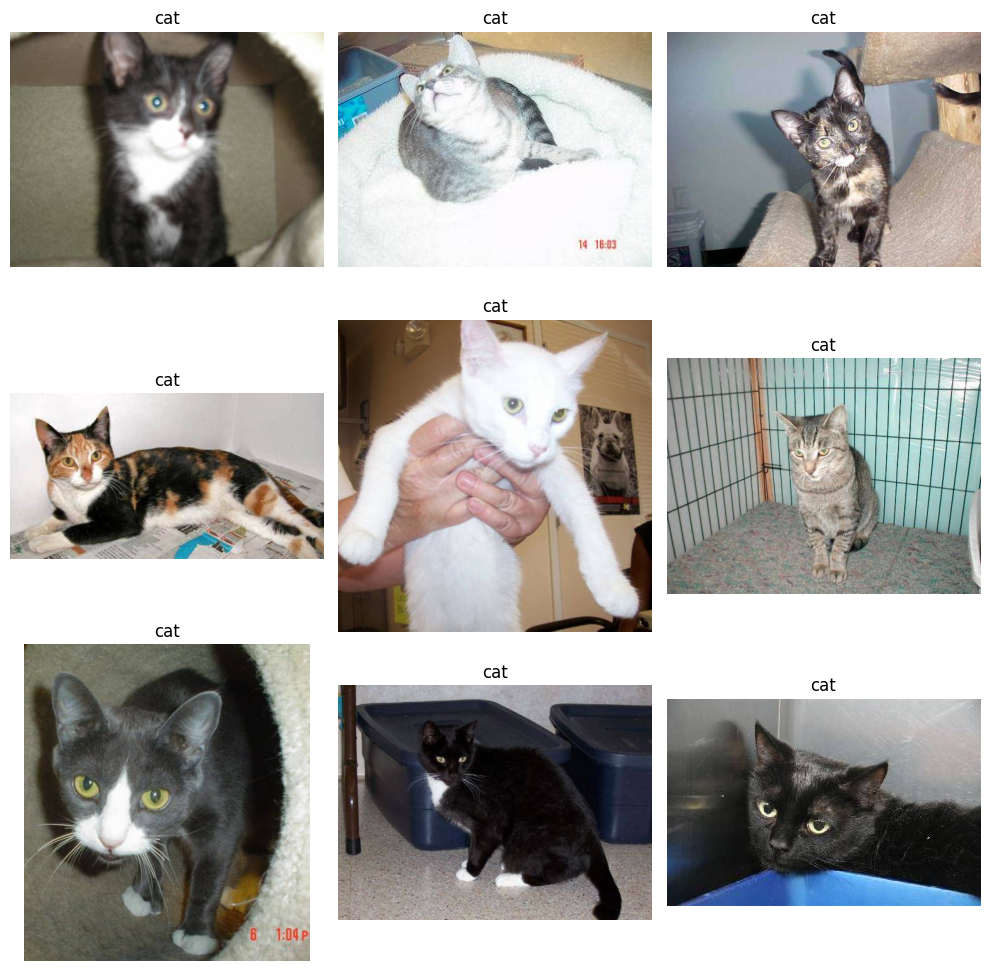

In [ ]:
cat_directory_path='/content/dogs_vs_cats/train/cats'
plot_image_from_directory(cat_directory_path,class_animal='cat')

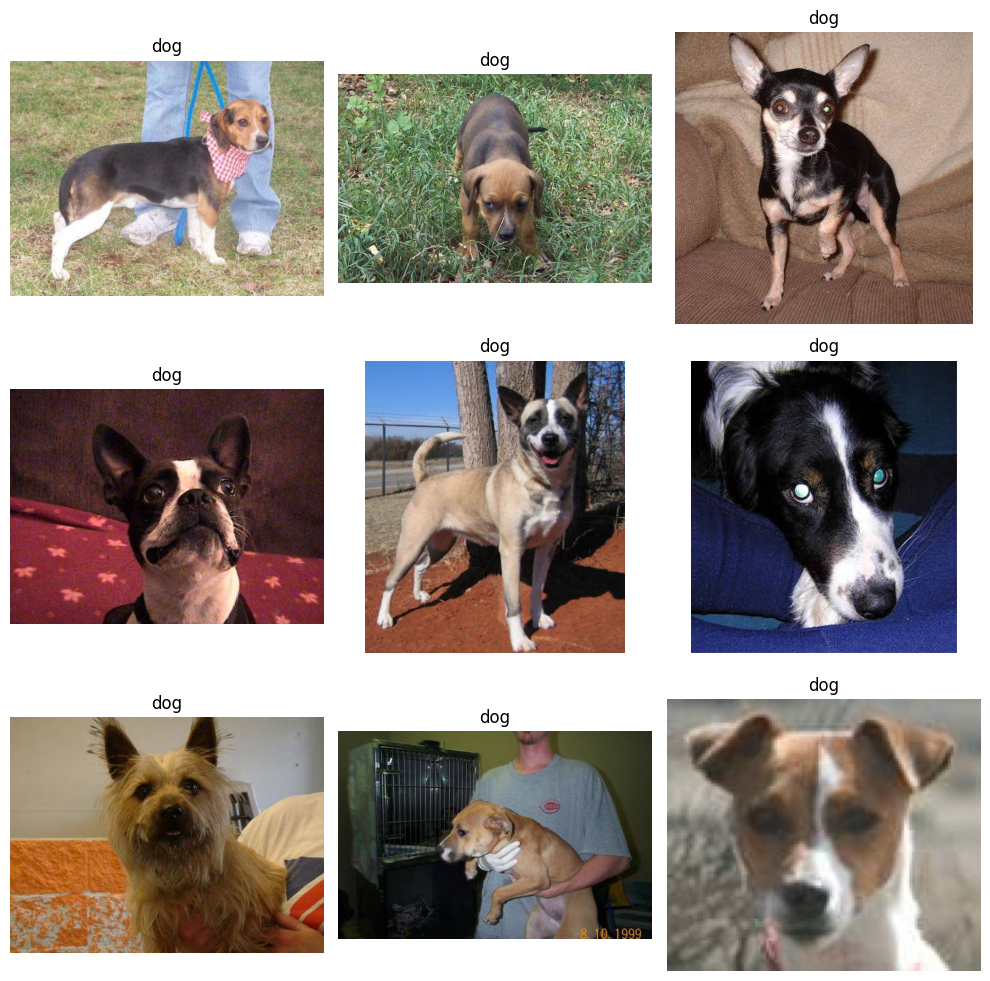

In [ ]:
dog_directory_path='/content/dogs_vs_cats/train/dogs'
plot_image_from_directory(dog_directory_path,class_animal='dog')

In [ ]:
cat_images=os.listdir(cat_directory_path)
dog_images=os.listdir(dog_directory_path)
classes_animals=['Cats','Dogs']
count=[len(cat_images),len(dog_images)]
print(count)

[10000, 10000]


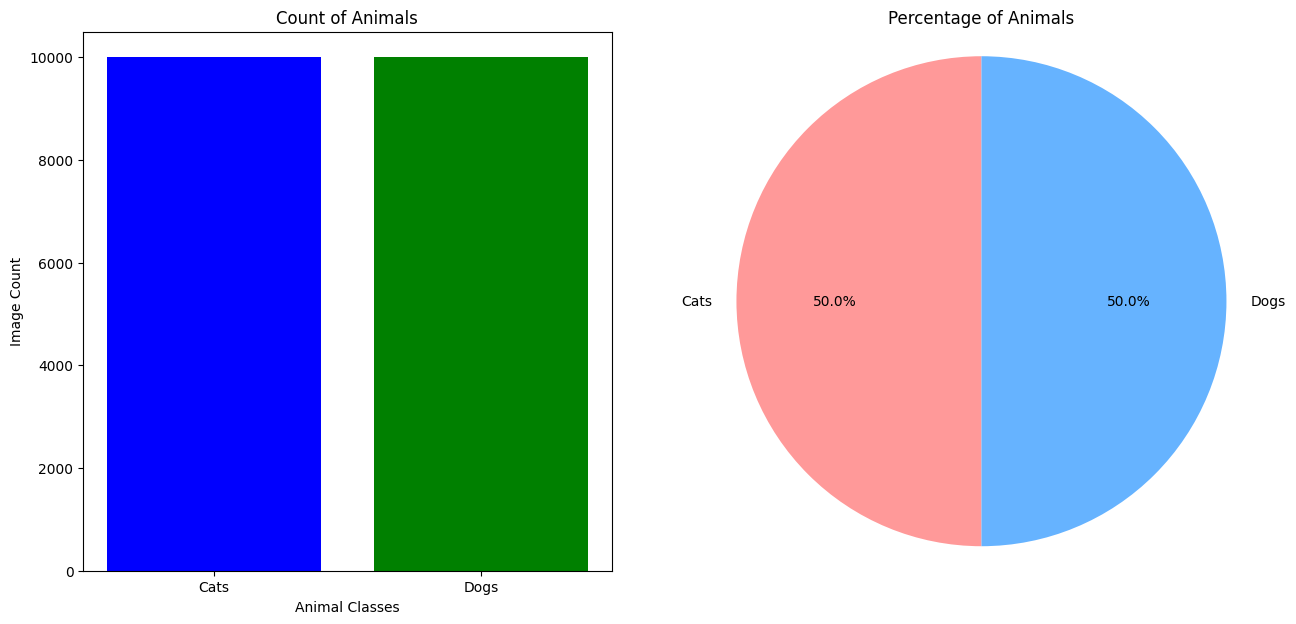

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(15,7))
ax[0].bar(classes_animals,count,color=['blue','green'])
ax[0].set_xlabel('Animal Classes')
ax[0].set_ylabel('Image Count')
ax[0].set_title('Count of Animals')
colors=['#ff9999','#66b3ff']
ax[1].pie(count,labels=classes_animals,colors=colors,autopct='%1.1f%%',startangle=90)
ax[1].set_title('Percentage of Animals')
ax[1].axis('equal')
plt.tight_layout
plt.show()

In [ ]:
import os
import cv2
import imghdr
image_exts=['jpng','jpg','png']
data_dir='/content/dogs_vs_cats'
for root,dirs,files in os.walk(data_dir):
  for file in files:
    file_path=os.path.join(root,file)
    try:
        file_type=imghdr.what(file_path)
        if file_type not in image_exts:
          print('Image not in ext list {}'.format(file_path))
          os.remove(file_path)
        else:
          img=cv2.imread(file_path)

    except Exception as e:
      print('Issue with image {}'.format(file_path))
      os.remove(file_path)
#

In [ ]:
def image_to_array(image_path):
  try:
    with Image.open(image_path) as img:
      img_array=img_to_array(img)
      return img_array
  except Exception as e:
    print(f"Error processing image {image_path}: {str(e)}")
    return None

In [ ]:
image_to_array('/content/dogs_vs_cats/train/dogs/dog.1000.jpg')

array([[[  9.,   8.,   4.],
        [ 10.,  11.,   6.],
        [ 13.,  13.,  11.],
        ...,
        [160., 162., 183.],
        [159., 161., 184.],
        [158., 160., 183.]],

       [[ 17.,  13.,  10.],
        [ 16.,  15.,  11.],
        [ 17.,  17.,  15.],
        ...,
        [157., 159., 180.],
        [156., 158., 181.],
        [155., 157., 180.]],

       [[ 17.,  12.,   8.],
        [ 17.,  13.,  10.],
        [ 17.,  16.,  14.],
        ...,
        [155., 157., 178.],
        [154., 156., 179.],
        [153., 155., 178.]],

       ...,

       [[110.,  95.,  88.],
        [111.,  96.,  89.],
        [112.,  97.,  90.],
        ...,
        [128., 111., 101.],
        [128., 112.,  99.],
        [128., 112.,  99.]],

       [[110.,  95.,  88.],
        [109.,  94.,  87.],
        [110.,  95.,  88.],
        ...,
        [129., 112., 102.],
        [129., 113., 100.],
        [129., 113., 100.]],

       [[113.,  98.,  91.],
        [110.,  95.,  88.],
        [109.,  

In [ ]:
image='/content/dogs_vs_cats/train/dogs/dog.1000.jpg'
import cv2
img=cv2.imread(image)
if img is not None:
  print('Image loaded successfully')
else:
  print('Failed to load image')

SyntaxError: invalid syntax (<ipython-input-10-41cad1731926>, line 7)